# Lab 1 Option 1 Trend Analysis (Python code)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Conduct a trend analysis of some variable of interest.  Graph it and try different functional forms.  Look for subgroup variation across time, too.


I wanted to look at the trend in American’s concern over crime. Specifically,
respondents are asked: “We are faced with many problems in this country, none of
which can be solved easily or inexpensively. I'm going to name some of these problems,
and for each one I'd like you to tell me whether you think we're spending too much
money on it, too little money, or about the right amount. What about halting the rising
crime rate? (1) Too Little, (2) About Right, or (3) Too Much? I recoded this variable to
make it easier to interpret like such:


In [ ]:
# read in data from the trends-gss.csv file
gss = pd.read_csv("trends-gss.csv")

In [ ]:
# subset the data to only include the 'natcrime', 'year', 'sex' variables
sub = gss[['natcrime', 'year', 'sex']]

# remove missing values
sub = sub.dropna()

In [ ]:
# display value frequencies
sub['natcrime'].value_counts()

1.0    21500
2.0     8374
3.0     1907
Name: natcrime, dtype: int64

In [ ]:
# Reverse-code natcrime
sub['n_natcrime'] = sub['natcrime'].replace([1, 3], [3, 1])

This now shows the following distribution of answers:

In [ ]:
# make sure reverse-code was done correctly
sub['n_natcrime'].value_counts(normalize = True)

3.0    0.676505
2.0    0.263491
1.0    0.060004
Name: n_natcrime, dtype: float64

In [ ]:
sub['n_natcrime'].value_counts()

3.0    21500
2.0     8374
1.0     1907
Name: n_natcrime, dtype: int64

This indicates that for all of the years, about 67.7% of respondents believe that we are
spending too little on crime prevention (Answer #3), and would like our government to
spend more.

Across time, however, the score on crime prevention (out of 3 points) has changed, as
illustrated by this graph:

In [ ]:
# calculate mean natcrime of each year
by_year = sub.groupby('year', as_index = False).agg({"n_natcrime": "mean"})\
          .rename(columns = {"n_natcrime": "mean_natcrime"})

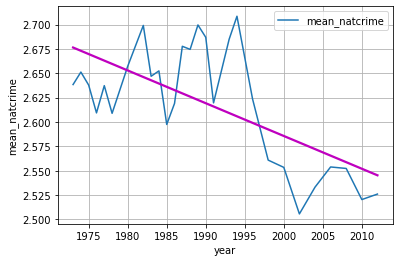

In [ ]:
# plot the trend using matplotlib 
by_year.plot(x = 'year', y = 'mean_natcrime', grid = True)

# superimpose a fitted line using the seaborn package
sns.regplot(x = 'year', y = 'mean_natcrime', data = by_year, 
            scatter = False, ci = None, fit_reg = True, color = 'm')

As can be seen, people expressed greater concern over time in the earlier period, from
roughly 1973 until the mid-1990s, and they expressed less concern for crime thereafter.


We would like to develop a regression model that would capture the dynamics of public
opinion on crime.  As a default, I will fit a linear model, where year is entered in as a
linear term.  The model is below:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fit regression model
lm_natcrime = smf.ols('n_natcrime ~ year', data = sub).fit()
lm_natcrime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_natcrime   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           6.01e-31
Time:                        22:40:41   Log-Likelihood:                -28636.
No. Observations:               31781   AIC:                         5.728e+04
Df Residuals:                   31779   BIC:                         5.729e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1007      0.560     16.252      0.000       8.003      10.198
year          -0.0033      0.000    -11.580      0.000      -0.004      -0.003
==============================================================================
Omnibus:                     5834.253   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9584.905
Skew:                          -1.303   Prob(JB):                         0.00
Kurtosis:                       3.670   Cond. No.                     3.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model shows that with each year that passes, concern over crime drops, on
average, by -0.003 points (on a 3 point scale); it is highly statistically significant
(p<.001). The Adjusted R-squared from this model is 0.0042, suggesting that we can
explain about 0.4 percent of the variation in concern for crime with our time trend, which
seems quite low.


At the other extreme, perhaps we can identify individual yearly movements by including
a comprehensive set of dummy variables for year.  That produces a table like this:

In [ ]:
# refit model using 'year' as dummy variable
lm_natcrime2 = smf.ols('n_natcrime ~ C(year)', data = sub).fit()
lm_natcrime2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_natcrime   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.63
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.13e-50
Time:                        22:40:42   Log-Likelihood:                -28546.
No. Observations:               31781   AIC:                         5.715e+04
Df Residuals:                   31753   BIC:                         5.738e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6384      0.016    166.395      0.000       2.607       2.670
C(year)[T.1974]     0.0128      0.022      0.571      0.568      -0.031       0.057
C(year)[T.1975]    -0.0006      0.022     -0.026      0.979      -0.045       0.043
C(year)[T.1976]    -0.0291      0.022     -1.299      0.194      -0.073       0.015
C(year)[T.1977]    -0.0011      0.022     -0.050      0.960      -0.045       0.043
C(year)[T.1978]    -0.0295      0.022     -1.329      0.184      -0.073       0.014
C(year)[T.1980]     0.0187      0.022      0.834      0.405      -0.025       0.063
C(year)[T.1982]     0.0607      0.021      2.856      0.004       0.019       0.102
C(year)[T.1983]     0.0085      0.022      0.387      0.699      -0.035       0.052
C(year)[T.1984]     0.0140      0.032      0.442      0.658      -0.048       0.076
C(year)[T.1985]    -0.0409      0.027     -1.502      0.133      -0.094       0.013
C(year)[T.1986]    -0.0194      0.028     -0.703      0.482      -0.073       0.035
C(year)[T.1987]     0.0393      0.029      1.334      0.182      -0.018       0.097
C(year)[T.1988]     0.0361      0.028      1.299      0.194      -0.018       0.091
C(year)[T.1989]     0.0612      0.027      2.264      0.024       0.008       0.114
C(year)[T.1990]     0.0485      0.028      1.712      0.087      -0.007       0.104
C(year)[T.1991]    -0.0188      0.027     -0.691      0.490      -0.072       0.035
C(year)[T.1993]     0.0465      0.027      1.742      0.081      -0.006       0.099
C(year)[T.1994]     0.0701      0.022      3.158      0.002       0.027       0.114
C(year)[T.1996]    -0.0149      0.022     -0.662      0.508      -0.059       0.029
C(year)[T.1998]    -0.0775      0.023     -3.410      0.001      -0.122      -0.033
C(year)[T.2000]    -0.0850      0.023     -3.758      0.000      -0.129      -0.041
C(year)[T.2002]    -0.1328      0.023     -5.828      0.000      -0.177      -0.088
C(year)[T.2004]    -0.1053      0.023     -4.656      0.000      -0.150      -0.061
C(year)[T.2006]    -0.0846      0.022     -3.799      0.000      -0.128      -0.041
C(year)[T.2008]    -0.0861      0.025     -3.465      0.001      -0.135      -0.037
C(year)[T.2010]    -0.1180      0.025     -4.771      0.000      -0.167      -0.070
C(year)[T.2012]    -0.1124      0.025     -4.516      0.000      -0.161      -0.064
==============================================================================
Omnibus:                     5862.026   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9648.903
Skew:                          -1.302   Prob(JB):                         0.00
Kurtosis:                       3.708   Cond. No.                         26.3
==============================================================================

Note

We can see that, for example, relative to 1973, concern over crime dropped on average
by -0.13 in 2002 (on a 3 point scale). The adjusted R-sq for this model is 0.009, which
is more than double the model with linear trend, even adjusting for the increase in
parameters in the model, so we do see greater fit, which makes sense since we are
modeling the annual dynamics of the public’s opinion on this issue.
Looking at the dummies, it appears that there is a simple level shift down from 1998
through 2010, with no real additional trend in the later period. A formal F test for
whether concern over crime in 1998 (B= -0.077) is different from 2010 (B=-0.118)
indicates no change, as the p-value on that F-statistic is not statistically significantly
different from zero (p=0.106).


#### Linear hypothesis test 

In [ ]:
hypothesis = '(C(year)[T.1998] = C(year)[T.2010])'
f_test = lm_natcrime2.f_test(hypothesis)
f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.61914336]]), p=0.10559135759522265, df_denom=3.18e+04, df_num=1>

p-value of 0.1056 indicates no change between crime rate in 1998 vs. 2010

The above dummy variable analysis suggests that we may want to make broader
periodizations.  We can split our time series into 2 periods: a period before 1996 and a
period of 1996 and after.  The code for that is:

In [ ]:
# Create a dummy variable `late` for years after 1996 as 1 and otherwise 0susu
sub['late'] = ((sub.year > 1996)).astype(int)

In [ ]:
# Fit periodization model
lm_natcrime_period = smf.ols('n_natcrime ~ late', data = sub).fit()
lm_natcrime_period.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_natcrime   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     237.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.29e-53
Time:                        22:40:42   Log-Likelihood:                -28584.
No. Observations:               31781   AIC:                         5.717e+04
Df Residuals:                   31779   BIC:                         5.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6506      0.004    661.883      0.000       2.643       2.658
late          -0.1116      0.007    -15.407      0.000      -0.126      -0.097
==============================================================================
Omnibus:                     5857.826   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9639.516
Skew:                          -1.304   Prob(JB):                         0.00
Kurtosis:                       3.695   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results from this table indicate that for 1996 and after, people’s concern over crime
on average drops by -0.11 points (on a 3 point scale), relative to their concern before 1996.

 The adjusted R-sq for this 0.0074, which is quite similar to the measure attained
with 27 year dummies, so on the basis of parsimony, this model performs quite well.
This model also has the benefit of perhaps landing upon the “turning point” in public
opinion on crime, tied to the 1994 Crime Bill that went into law, increasing spending and
creating harsher sentences for prison. The public may have gotten the message that
crime was under control and didn’t need as many additional resources after that.

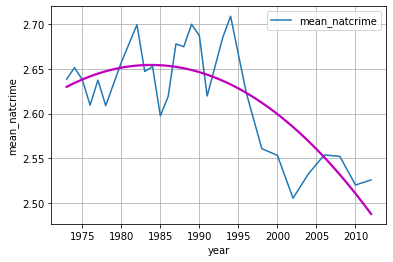

In [ ]:
# plot the trend using matplotlib 
by_year.plot(x = 'year', y = 'mean_natcrime', grid = True)

# superimpose a quadratic fitted line using the seaborn package, specifying 'order = 2' for quadratic fit
sns.regplot(x = 'year', y = 'mean_natcrime', data = by_year, order = 2,
            scatter = False, ci = None, fit_reg = True, color = 'm')

In [ ]:
lm_natcrimesq = smf.ols('n_natcrime ~ year + np.square(year)', data = sub).fit()
lm_natcrimesq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_natcrime   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     95.06
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           6.89e-42
Time:                        22:40:43   Log-Likelihood:                -28608.
No. Observations:               31781   AIC:                         5.722e+04
Df Residuals:                   31778   BIC:                         5.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -820.6841    111.087     -7.388      0.000   -1038.419    -602.949
year                0.8302      0.112      7.441      0.000       0.612       1.049
np.square(year)    -0.0002    2.8e-05     -7.470      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     5837.624   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9592.091
Skew:                          -1.302   Prob(JB):                         0.00
Kurtosis:                       3.680   Cond. No.                     1.32e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note: individual coefficients of linear and quadratic terms cannot be interpreted directly. Their signs, however, suggest something. If the linear term if positive, it means the mean concern over crime is increasing initially, but at point starts to fall because the quadratic term is negative. 

If you want to know when exactly does Y starts to fall, you have to do a first order condition of the fitted linear equation with respect to year, and the local maximum is somewhere close to 1983.

## Interaction of gender with "late period"

In [ ]:
sub['late'] = np.where(sub.year > 1996, 1, 0)

In [ ]:
# map the indicators variables for sex back to 1 and 2
sub['sex'].replace({'Male': 1, 'Female': 2}, inplace = True)

lm_natcrime_period_int = smf.ols('n_natcrime ~ late*C(sex)', data = sub).fit()
lm_natcrime_period_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_natcrime   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.48e-98
Time:                        22:40:46   Log-Likelihood:                -28475.
No. Observations:               31781   AIC:                         5.696e+04
Df Residuals:                   31777   BIC:                         5.699e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6070      0.006    438.124      0.000       2.595       2.619
C(sex)[T.2]          0.0794      0.008      9.895      0.000       0.064       0.095
late                -0.1417      0.011    -13.157      0.000      -0.163      -0.121
late:C(sex)[T.2]     0.0545      0.015      3.754      0.000       0.026       0.083
==============================================================================
Omnibus:                     5783.866   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9462.520
Skew:                          -1.291   Prob(JB):                         0.00
Kurtosis:                       3.689   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results indicate that in the earlier period, women were 0.079 points more concerned
about crime than men. Men’s concern fell by -0.141 in the later period. But women’s
concern only fell by about half that, at -0.087(=-0.141 + 0.054) in the later period. This
difference in the later period accounts for the growing gap in concern for crime that
emerges after 1996. The interaction term is highly statistically significant (p<.001), so
the interaction is appropriate here. The adjusted R-sq in this model is substantially
higher than the previous model (of trend alone) because gender, in general, is a
meaningful predictor of concern for crime.
